In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# matplotlib.rcParams['figure.figsize'] = (20,10)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [5]:
df1 = df.drop(['area_type','availability','society','balcony'], axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

# data cleaning

In [7]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df2['size'].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [9]:
df2['BHK'] = df2['size'].apply(lambda x:int(x.split(' ')[0]))
df2['BHK'].unique()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_18392\195517363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK'] = df2['size'].apply(lambda x:int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [10]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df2[df2['BHK']>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [12]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
def convert_sqft_range_to_num(x):
    vals = x.split("-")
    if len(vals) == 2:
        return (float(vals[0]) + float(vals[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_range_to_num)
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

# feature engineering

In [17]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']  # as the price in lacs
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [18]:
df4['location'] = df4['location'].apply(lambda x: x.strip())

In [19]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [20]:
# using localocation_stats series
len(location_stats[location_stats<=10])

1052

In [21]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [22]:
len(df4['location'].unique())

1293

In [23]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4['location'].unique())

242

# outlier detection and removal

In [24]:
# sqft/bhk < 300
df4[df4['total_sqft']/df4['BHK']<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [25]:
df4.shape

(13246, 7)

In [26]:
df5 = df4[~(df4['total_sqft']/df4['BHK']<300)]
df5.shape

(12502, 7)

In [27]:
df5['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [28]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        sd = np.std(subdf['price_per_sqft'])
        # taking only data lies in 1st sd (around 75% assuming distribution is normal)
        reduced_df = subdf[(subdf['price_per_sqft']>(mean - sd)) & (subdf['price_per_sqft']<=(mean + sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df6 = remove_pps_outlier(df5)
df6.shape

(10241, 7)

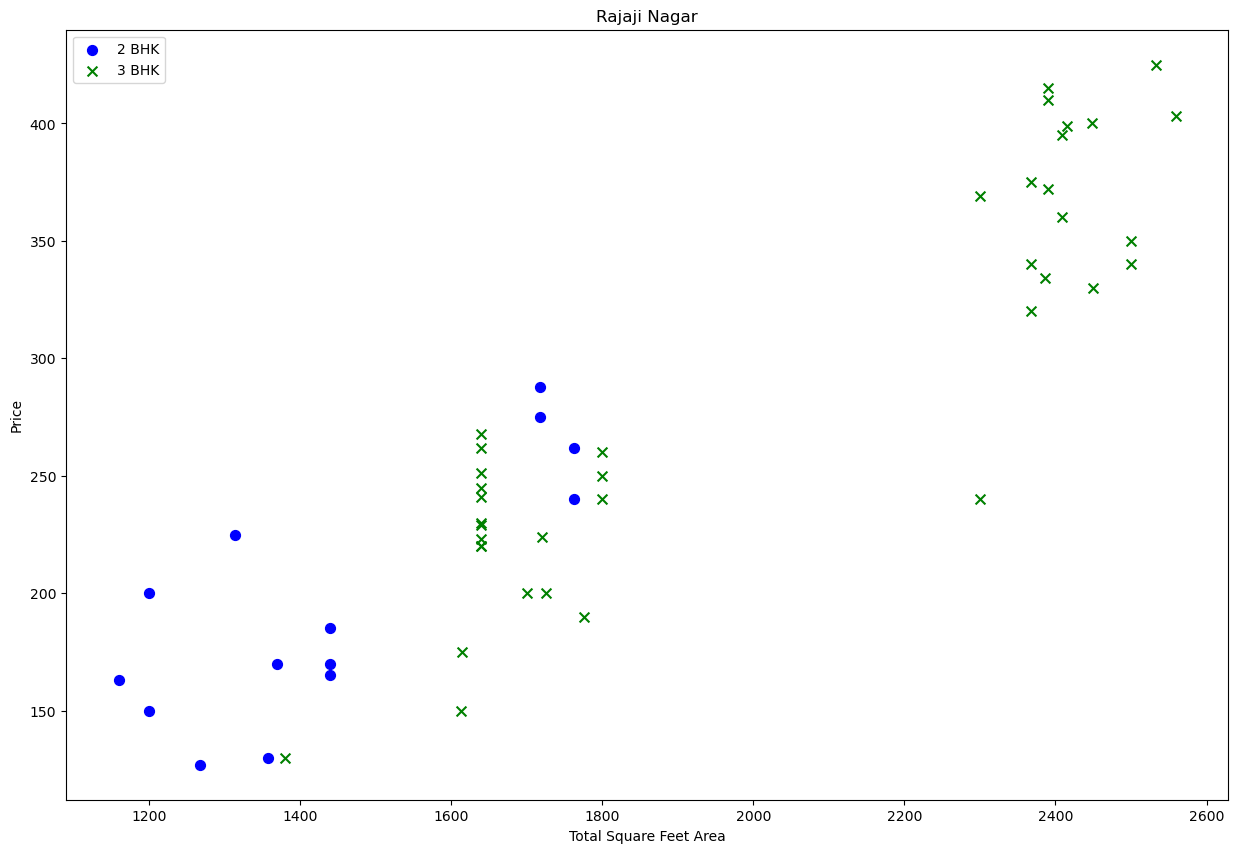

In [29]:
# now detecting outlier where 3BHK of same sqft has low price then 2BHK of nearly same area_sqft
def plot_scatter_chart(df, location):
    bhk2 = df[(df['location'] == location) & (df['BHK'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['BHK'] == 3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker='x', color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6, 'Rajaji Nagar')

### now we should also remove properties where for the same location with same square ft area, price of 3 BHK is less than the price of 2 BHK. what we will do is we build a dictionary of stats per BHK. i.e
{
    '1' : {
        'mean' : 4000,
        'std' : 2000,
        'count' : 34
    },
    '2' : {
        'mean' : 4300,
        'std' : 2300,
        'count' : 24
    },
}
### now we can remove those 2 BHK whose price_per_sqft is less than mean price_per_sqft of 1 BHK

In [30]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df['price_per_sqft']),
                'std' : np.std(bhk_df['price_per_sqft']),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df7 = remove_bhk_outlier(df6)
df7.shape

(7329, 7)

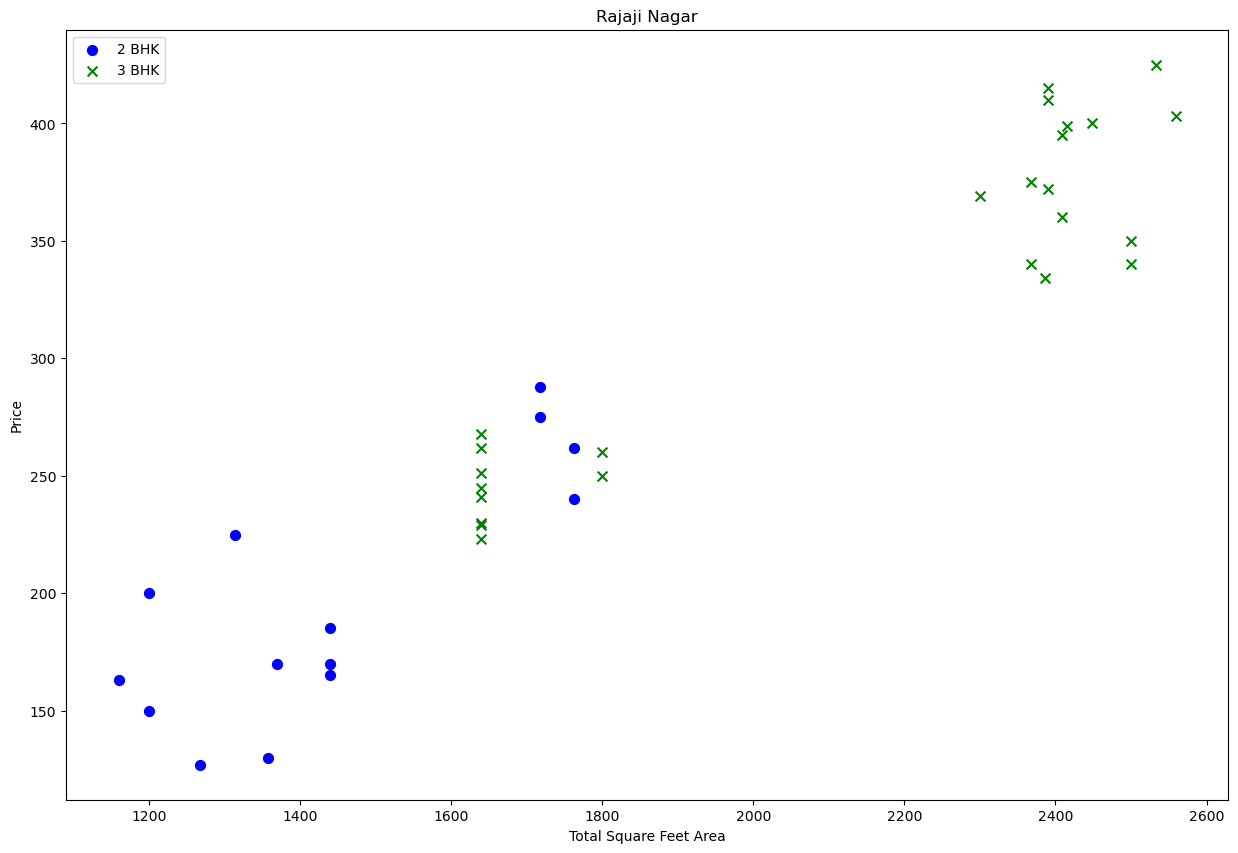

In [31]:
plot_scatter_chart(df7, 'Rajaji Nagar')

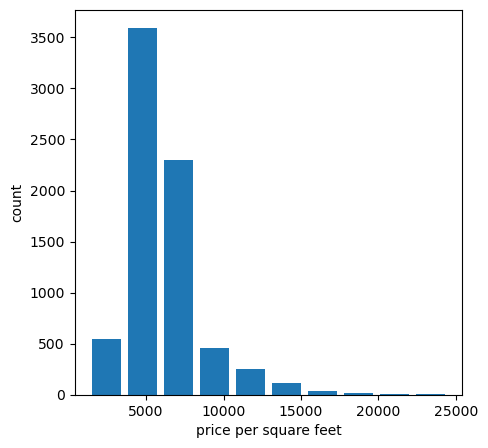

In [32]:
plt.rcParams['figure.figsize'] = (5,5)
plt.hist(df7['price_per_sqft'], rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')
plt.show()

In [33]:
# observing bath column
df7['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [34]:
df7[df7['bath']>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


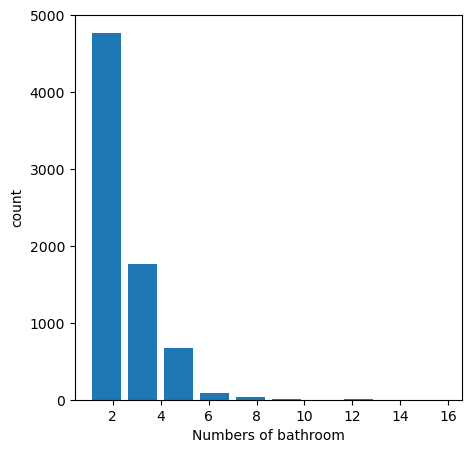

In [35]:
plt.hist(df7['bath'], rwidth=0.8)
plt.xlabel('Numbers of bathroom')
plt.ylabel('count')
plt.show()

In [36]:
# if numbers of bathrooms are > numbers of room + 2 then it an outlier so we remove them
df7[df7['bath']>df7['BHK']+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [37]:
df8 = df7[df7['bath']<df7['BHK']+2]
df8.shape

(7251, 7)

In [38]:
df9 = df8.drop(['size', 'price_per_sqft'], axis=1)
df9.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [39]:
# now for locaton we do one hot encoding with the pandas's get_dummies
dummies = pd.get_dummies(df9['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df10 = pd.concat([df9, dummies.drop('other', axis=1)], axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df11 = df10.drop(['location'], axis=1)
df11.head(3)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df11.shape

(7251, 245)

# model building

In [43]:
x = df11.drop(['price'], axis=1)
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
y = df11['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8452277697874324

In [47]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [50]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'n_jobs' : [10, 100]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score', 'best_params'])


find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'n_jobs': 10}
1,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.713903,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [52]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [53]:
y_pred = rfr.predict(x_test)
y_pred

array([84.1755    , 36.3031    , 53.37219048, ..., 36.3176    ,
       69.76233333, 60.36259524])

In [54]:
r2 = r2_score(y_test,y_pred)
print("r2 score : ", r2)

r2 score :  0.7962163201194818


In [55]:
# as linear regression gives us the best accuracy so we are going to use that model

In [56]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [61]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns==location)[0][0]

    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1

    return model.predict([z])[0]

In [62]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.49904677185246

In [63]:
predict_price('Indira Nagar', 1000, 2, 2)

181.2781548400676

# dumping the model into the pickle file

In [64]:
import pickle
with open('banglore_house_price_model.pickle','wb') as f:
    pickle.dump(model, f)

In [65]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))